In [64]:
#Importing packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [65]:
#Loading data
df = pd.read_csv("C:\\Users\\nithi\\OneDrive\\Big Data\\Data analysis Project\\My_Data.csv")

In [66]:
#Get information about data
df.info

<bound method DataFrame.info of                  Job titiles AI Impact  Tasks  AI models  AI_Workload_Ratio  \
0     Communications Manager       98%    365       2546           0.143362   
1             Data Collector       95%    299       2148           0.139199   
2                 Data Entry       95%    325       2278           0.142669   
3                 Mail Clerk       95%    193       1366           0.141288   
4         Compliance Officer       92%    194       1369           0.141709   
...                      ...       ...    ...        ...                ...   
4701                  Singer        5%    686       2798           0.245175   
4702                 Airport        5%    556       2206           0.252040   
4703                Director        5%   1316       4695           0.280298   
4704                   Nurse        5%    710       2594           0.273709   
4705              Technician        5%    825       3256           0.253378   

                   

In [67]:
print( df.head())

              Job titiles AI Impact  Tasks  AI models  AI_Workload_Ratio  \
0  Communications Manager       98%    365       2546           0.143362   
1          Data Collector       95%    299       2148           0.139199   
2              Data Entry       95%    325       2278           0.142669   
3              Mail Clerk       95%    193       1366           0.141288   
4      Compliance Officer       92%    194       1369           0.141709   

                      Domain  
0         Communication & PR  
1                  Data & IT  
2  Administrative & Clerical  
3      Leadership & Strategy  
4       Medical & Healthcare  


In [68]:
 df.isnull()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
4701,False,False,False,False,False,False
4702,False,False,False,False,False,False
4703,False,False,False,False,False,False
4704,False,False,False,False,False,False


In [69]:
#The column AI_Workload_Ratio has some Infinite values that had to be removed for analysis
df['AI_Workload_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [70]:
#check for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Job titiles - 0%
AI Impact - 0%
Tasks - 0%
AI models - 0%
AI_Workload_Ratio - 0%
Domain - 0%


In [71]:
#Renaming the Column Job Titiles to Job Titles

df.rename(columns ={'Job titiles' : 'Job Titles'}, inplace = True  )

In [72]:
#We create a variable to store our column names in case they need to be reminded of

column_names = df.columns.tolist()

print("Column names:", column_names)

Column names: ['Job Titles', 'AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio', 'Domain']


In [73]:
#Drop duplicates

df.drop_duplicates()

,Job Titles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4701,Singer,5%,686,2798,0.245175,Data & IT
4702,Airport,5%,556,2206,0.252040,Administrative & Clerical
4703,Director,5%,1316,4695,0.280298,Leadership & Strategy
4704,Nurse,5%,710,2594,0.273709,Medical & Healthcare


In [74]:
#order data 

df.sort_values (by = ['AI Impact'], inplace = False, ascending = False )

,Job Titles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
1,Data Collector,95%,299,2148,0.139199,Data & IT
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4201,Hospitalist,10%,434,1789,0.242594,Data & IT
4202,Immunologist,10%,455,1815,0.250689,Administrative & Clerical
4203,Medical Doctor,10%,472,1673,0.282128,Leadership & Strategy
4204,Mental Health Clinician,10%,614,2293,0.267771,Medical & Healthcare


## Brief Analysis
We conduct a brief statistical analysis using df.describe() to obtain key summary statistics such as count, mean, average, minimum, maximum, and more.

In [75]:
#Run a quick statistical analysis to gain insights on the data
df.describe()

,Tasks,AI models,AI_Workload_Ratio
count,4706.000000,4706.000000,4699.000000
mean,400.708032,1817.678071,0.204619
std,311.564781,1086.853037,0.076547
min,1.000000,0.000000,0.036585
25%,161.000000,1085.250000,0.137262
50%,270.000000,1577.500000,0.198885
75%,608.750000,2273.000000,0.260450
max,1387.000000,5666.000000,1.000000


#### From this quick description we get some clues that will help us in our investigation:

- AI Impact Distribution: The "AI Impact" values vary between 0.05 and 0.98, indicating a wide range of AI influence across job titles.

- Tasks Distribution: The "Tasks" column ranges from 1 task to 1387 tasks, indicating a diverse set of job roles with varying levels of responsibility and complexity.

- AI Models Integration: The "AI models" column reveals that the average number of AI models associated with each job title is around 1817, suggesting significant adoption of AI technology. The wide standard deviation of 1086.853 indicates varying levels of AI integration across different job roles.

- AI Workload Ratio: The "AI_Workload_Ratio" has a range from 0.036 to 1.0, indicating that some job roles have minimal AI involvement (low ratios), while others rely heavily on AI (high ratios).

- Missing Data in AI_Workload_Ratio: We can see that some of the data within the "AI_Workload_Ratio" column has infinite values, we can verify this by seeing the max on that column.

- Variability: The standard deviations for "AI Impact," "Tasks," "AI models," and "AI_Workload_Ratio" suggest that there is considerable variability within each of these measures across different job titles.

- Correlations and Relationships: There might be relationships or correlations between these columns that could be explored further. For instance, a higher number of tasks might be associated with a higher number of AI models and a higher AI impact.

## Top 10 most impacted jobs

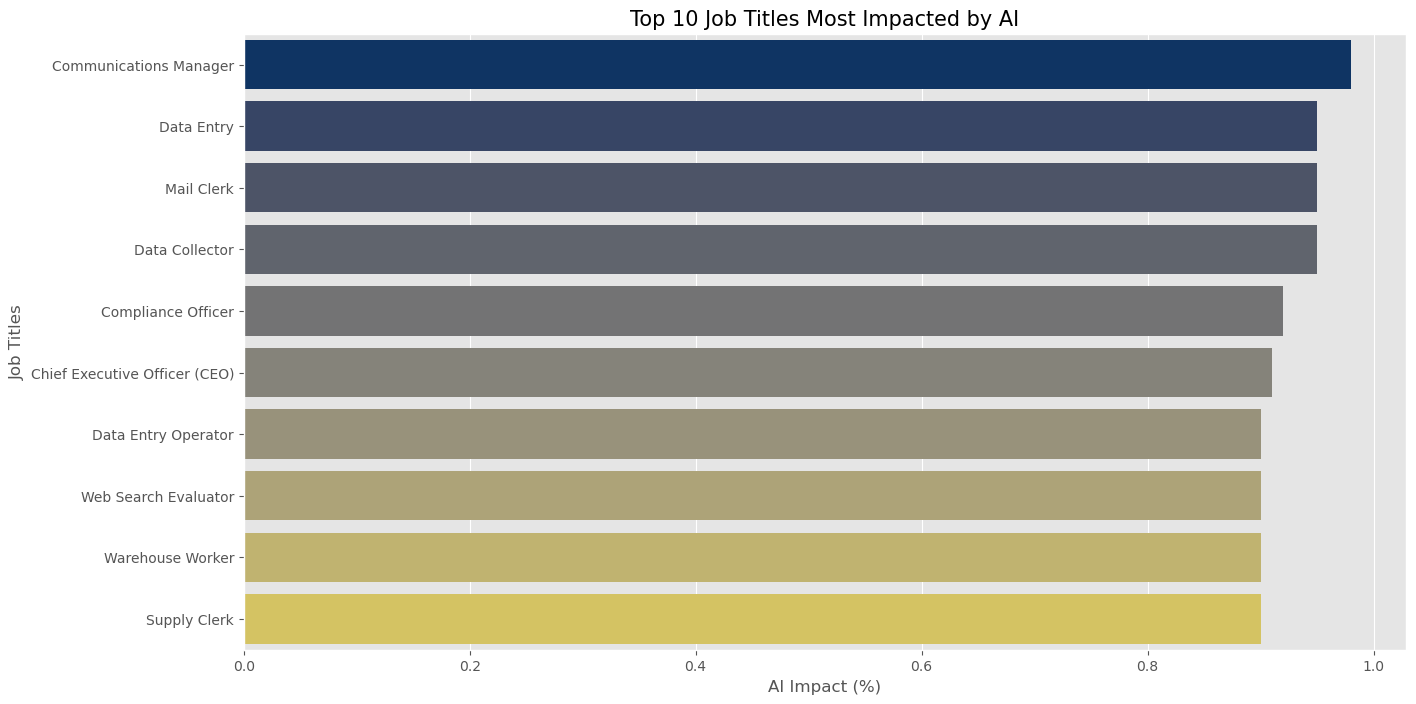

In [76]:
# Changing the data type in the AI Impact column to Integer while removing the % sign as well

df['AI Impact'] = (df['AI Impact'].str.rstrip('%').astype('int')) / 100
top_10_impacted_jobs = df.sort_values(by='AI Impact', ascending=False).head(10)

# Plotting the top 10 impacted jobs
plt.figure(figsize=(15, 8))
sns.barplot(x='AI Impact', y='Job Titles', data=top_10_impacted_jobs, palette='cividis')
plt.title('Top 10 Job Titles Most Impacted by AI', fontsize=15)
plt.xlabel('AI Impact (%)', fontsize=12)
plt.ylabel('Job Titles', fontsize=12)
plt.show()

## Top 10 Job titles Least Impacted by AI

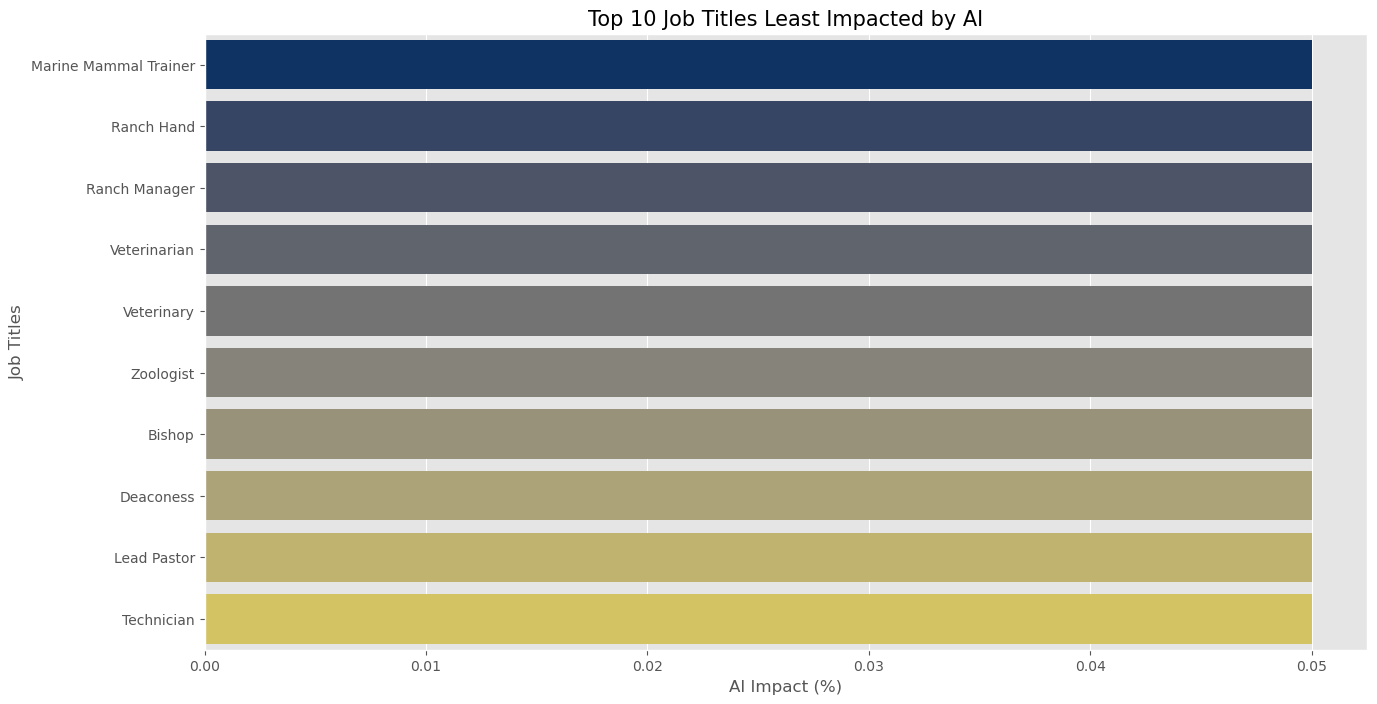

In [77]:
# Sorting the DataFrame in descending order by AI Impact
bottom_10_impacted_jobs = df.sort_values(by='AI Impact', ascending=False).tail(10)

# Plotting the top 10 least impacted jobs
plt.figure(figsize=(15, 8))
sns.barplot(x='AI Impact', y='Job Titles', data=bottom_10_impacted_jobs, palette='cividis')
plt.title('Top 10 Job Titles Least Impacted by AI', fontsize=15)
plt.xlabel('AI Impact (%)', fontsize=12)
plt.ylabel('Job Titles', fontsize=12)
plt.show()

## What Domains take the most AI impact

<AxesSubplot:xlabel='AI Impact', ylabel='Domain'>

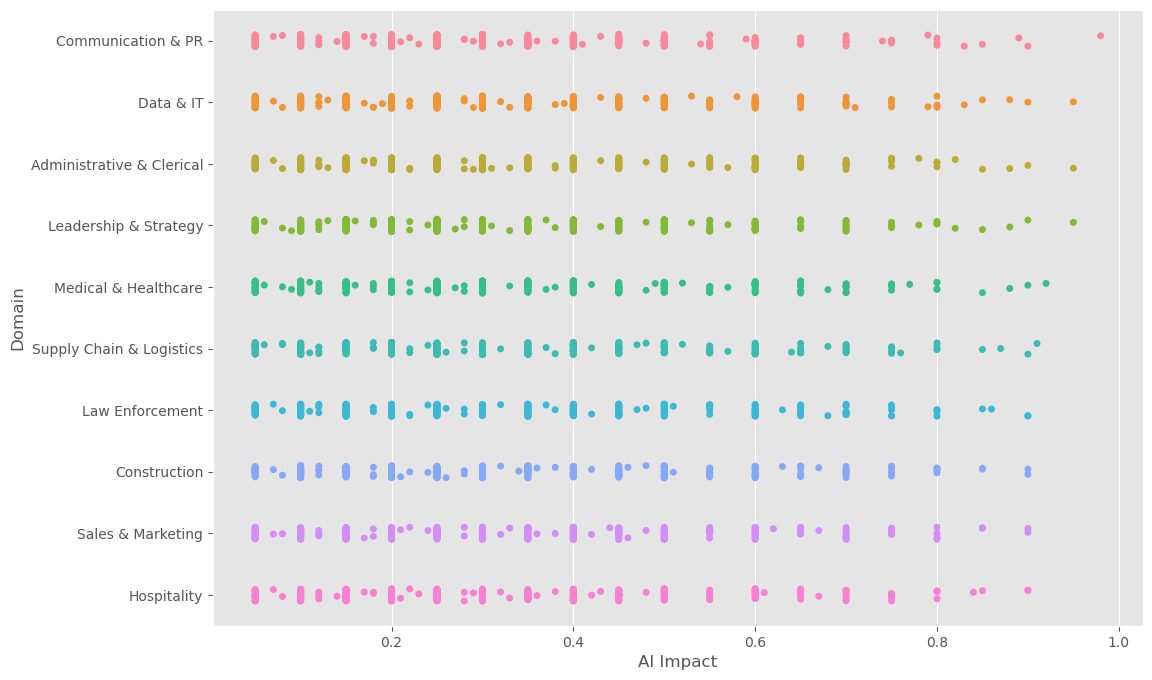

In [78]:
#This stripplot shows us which domains have the most jobs closest to AI Impact of 100%

sns.stripplot(x="AI Impact", y="Domain", data=df)

The outcomes indicate that domains such as "Communication and PR," "Data and IT," and "Administrative and Clerical" have jobs that are most proximate to complete AI automation. However, there is an overarching trend wherein a substantial portion of jobs across all domains exhibit job impact scores exceeding 80%, suggesting their potential for future automation.

## Studying correlation among numerical values

In [79]:
#We calculate the correlation using the Pearson Correlation

df.corr(method='pearson')

,AI Impact,Tasks,AI models,AI_Workload_Ratio
AI Impact,1.000000,-0.419760,-0.413176,-0.287871
Tasks,-0.419760,1.000000,0.928350,0.631305
AI models,-0.413176,0.928350,1.000000,0.346893
AI_Workload_Ratio,-0.287871,0.631305,0.346893,1.000000


In [80]:
#pull the pairs with highest correlation in our data
#Give integer numbers to all of our string values
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

#We use unstack to ive a wide format
corr_pairs = correlation_mat.unstack()

# we sort our values using the "quicksort" method, which is great for large datasets

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

strong_correlation = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_correlation)

Tasks              AI Impact            0.516140
AI Impact          Tasks                0.516140
AI_Workload_Ratio  Tasks                0.529724
Tasks              AI_Workload_Ratio    0.529724
                   Job Titles           0.538828
Job Titles         Tasks                0.538828
Tasks              AI models            0.558121
AI models          Tasks                0.558121
                   AI Impact            0.677956
AI Impact          AI models            0.677956
AI_Workload_Ratio  AI models            0.684237
AI models          AI_Workload_Ratio    0.684237
                   Job Titles           0.696205
Job Titles         AI models            0.696205
AI_Workload_Ratio  AI Impact            0.922512
AI Impact          AI_Workload_Ratio    0.922512
AI_Workload_Ratio  Job Titles           0.958314
Job Titles         AI_Workload_Ratio    0.958314
AI Impact          Job Titles           0.963318
Job Titles         AI Impact            0.963318
                   J

### Based on these correlation results, we can observe the following aspects:

Job Titles exhibit notably strong correlations with AI Impact (0.963), AI_Workload_Ratio (0.958), and AI models (0.696), indicating a close relationship between job titles and these factors.

AI Impact also demonstrates strong correlations with AI models (0.678) and AI_Workload_Ratio (0.923), suggesting a significant link between the impact of AI and these variables.

Tasks and AI models have a relatively high correlation (0.558), potentially implying that the complexity of tasks is connected to the implementation of AI models.

 ## Represent visually our correlations

<AxesSubplot:xlabel='Tasks', ylabel='AI models'>

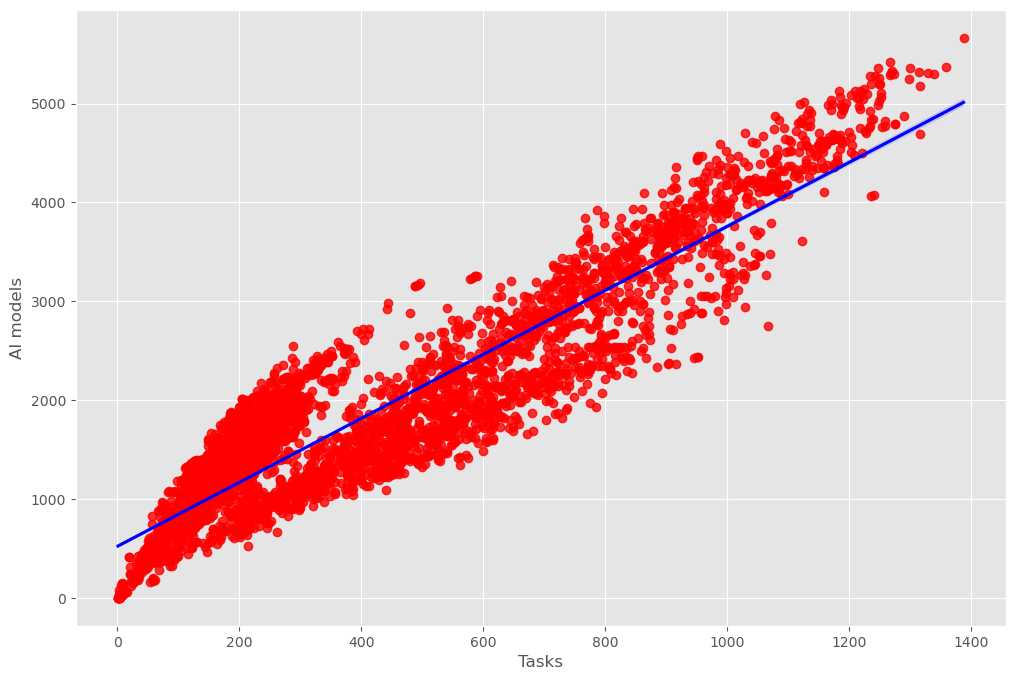

In [81]:
# Possible correlation between Tasks and AI Models

sns.regplot (x= 'Tasks', y= 'AI models', data = df,scatter_kws = {"color":"red"}, line_kws = {"color":"Blue"})

<AxesSubplot:xlabel='Tasks', ylabel='AI_Workload_Ratio'>

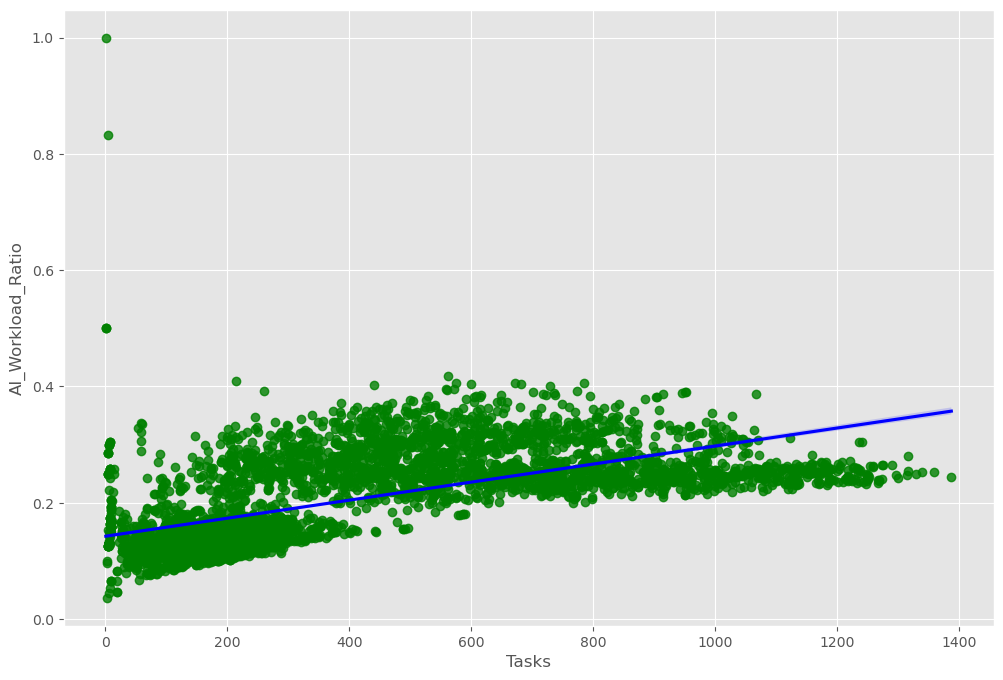

In [82]:
#Possible Correlation between AI_Workload_Radio and Tasks

sns.regplot (x= 'Tasks', y= 'AI_Workload_Ratio', data = df,scatter_kws = {"color":"green"}, line_kws = {"color":"blue"})

<AxesSubplot:xlabel='AI models', ylabel='AI_Workload_Ratio'>

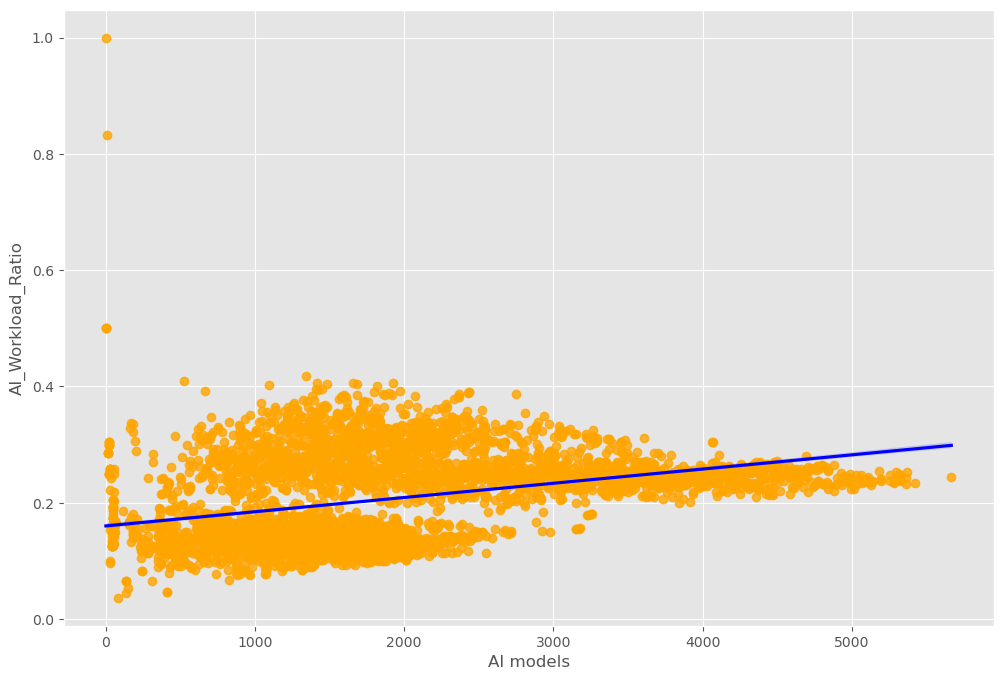

In [83]:
#Possible correlation between AI Models and AI_Workload_Ratio

sns.regplot (x= 'AI models', y= 'AI_Workload_Ratio', data = df,scatter_kws = {"color":"orange"}, line_kws = {"color":"blue"})

## Matrix correlation

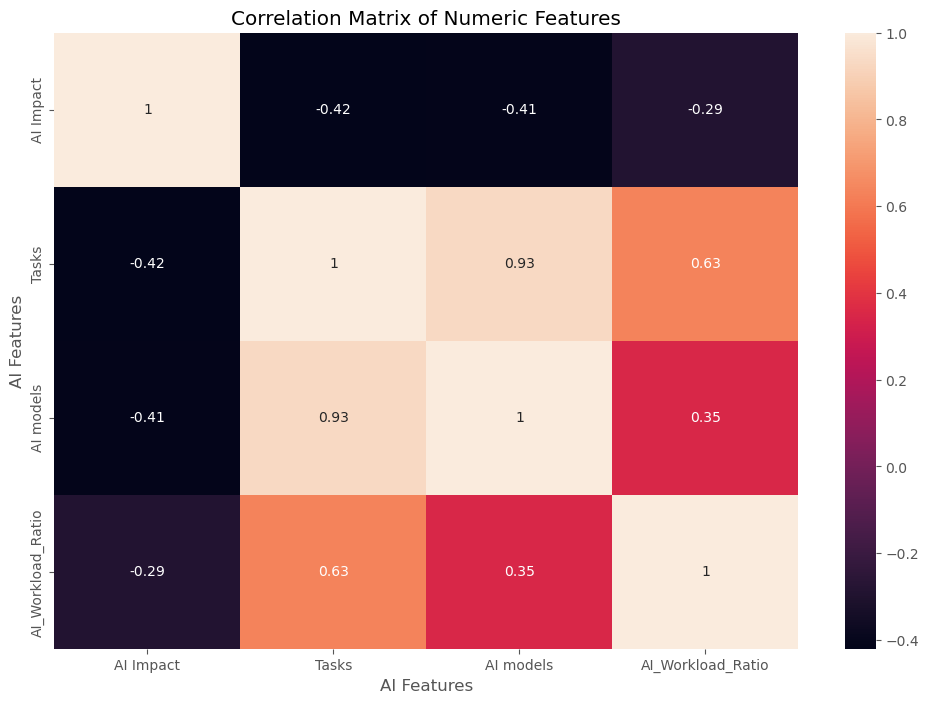

In [84]:
#We represent correlation using a Heatmap

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix of Numeric Features')
plt.xlabel('AI Features')
plt.ylabel('AI Features')
plt.show()

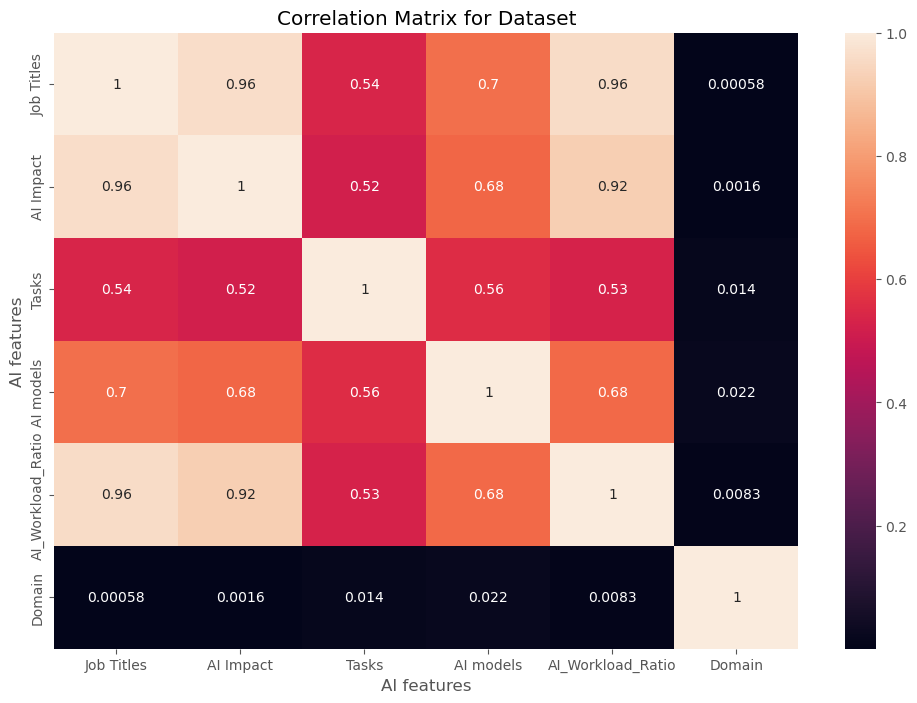

In [85]:
#We assign numerical values to the String values

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

#We Create a matrix that includes this new values and examine that correlation

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Dataset")

plt.xlabel("AI features")

plt.ylabel("AI features")

plt.show()

## Tasks Vs AI Models scatterplot based on Domain

Correlation between 'Tasks' and 'AI models', with 'Domains' represented as the hue. This scatter plot aims to provide a swift overview of the positioning of various domains within this relationship.

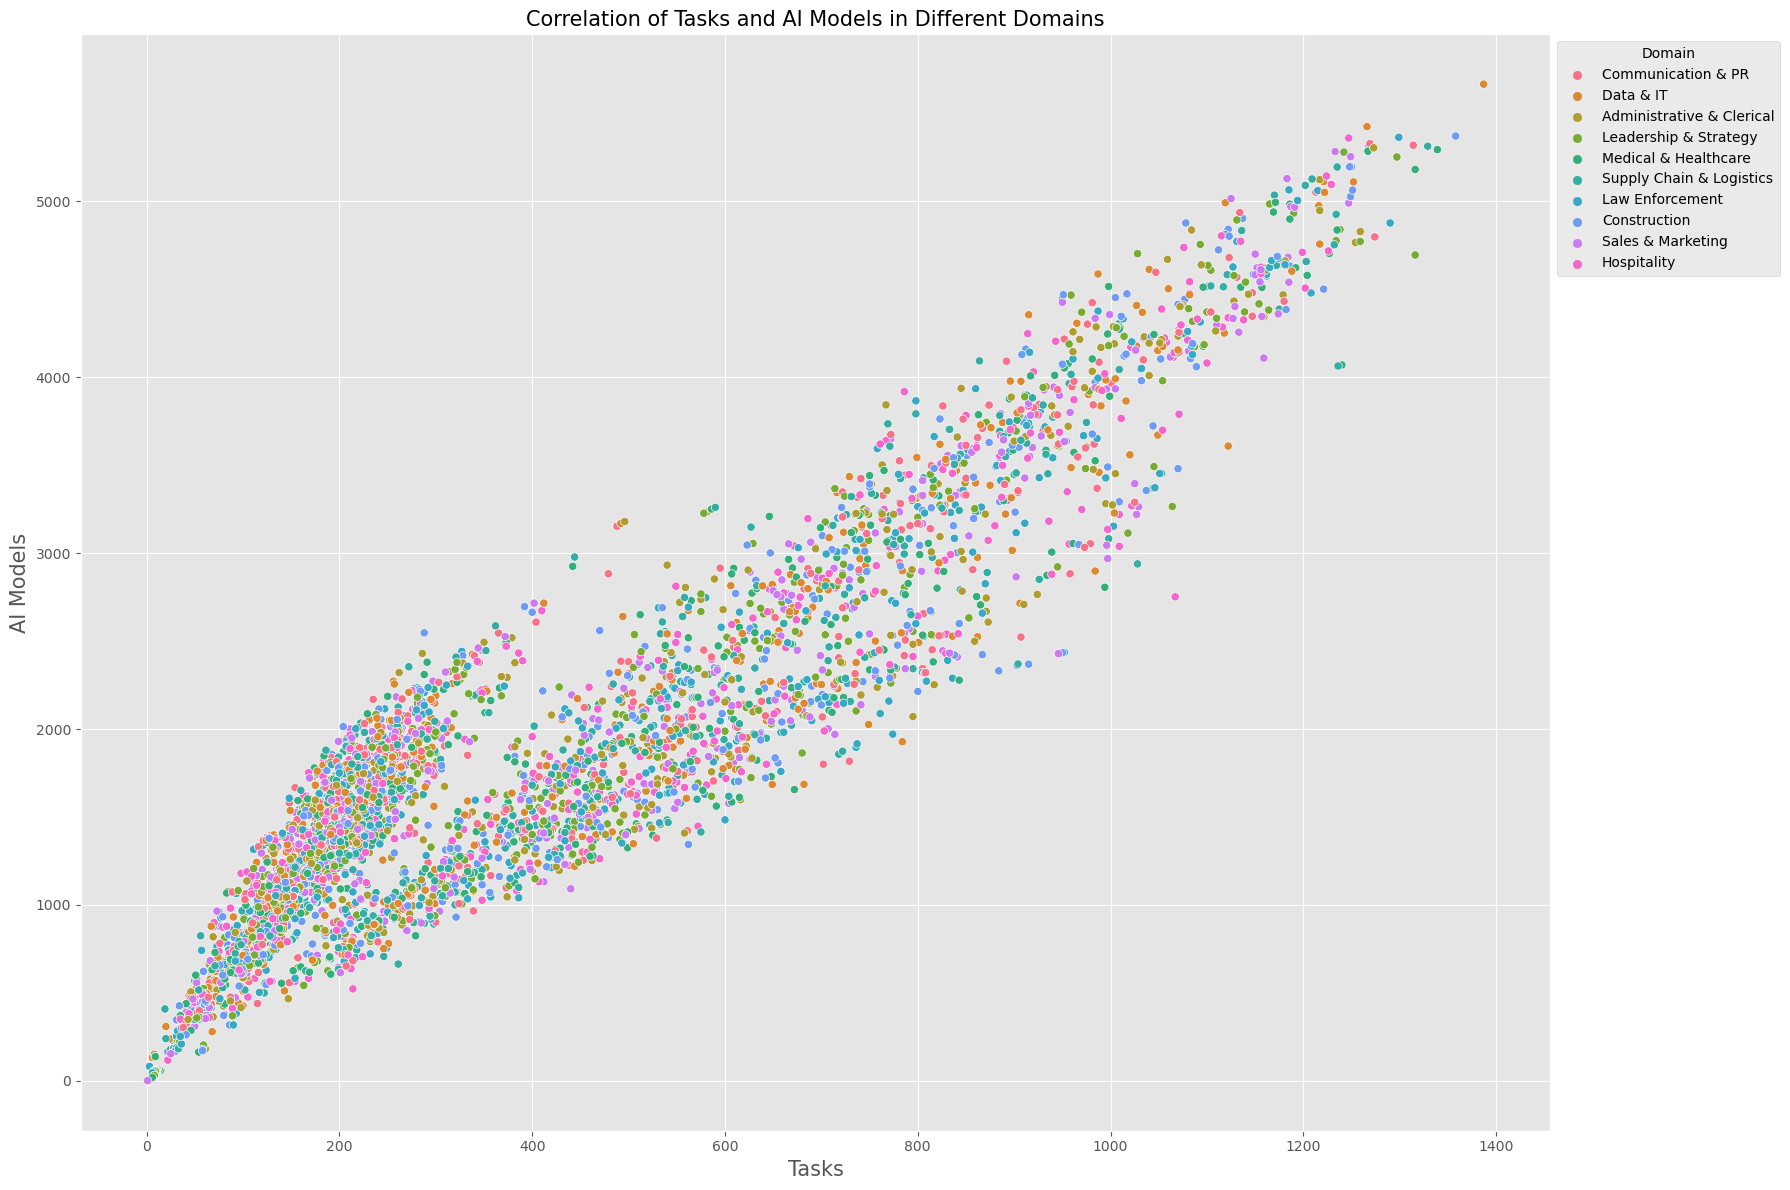

In [86]:
#We create a scatterplot that shows the Relationship between Tasks and AI Models by Domain

plt.figure(figsize=(18, 12))
sns.scatterplot(data=df, x='Tasks', y='AI models', hue='Domain')
plt.title('Correlation of Tasks and AI Models in Different Domains', fontsize=15)
plt.xlabel('Tasks', fontsize=15)
plt.ylabel('AI Models', fontsize=15)
plt.legend(title='Domain', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

The majority of jobs typically entail a relatively modest number of tasks (ranging from 0 to 400), indicating that a relatively small number of AI models (ranging from 0 to 2500) would be necessary to potentially replace human labor and fulfill the requirements of those jobs.

## Act
Based on our investigation, it is evident that AI is exerting its influence across all societal job domains, albeit to varying extents. Particularly, its impact is more pronounced in job areas that rely less on manual tasks and are more intertwined with computer-based functions. This highlights the widespread nature of AI's reach and its concentrated effect on roles closely tied to computational processes.

The inevitable integration of AI into our daily work tasks should not be perceived solely as a threat to our jobs, but rather as an opportunity for growth. Liberated from mundane and routine tasks, we can channel our efforts into more profound responsibilities that demand extended development time. Endeavors such as these projects and reports can serve as invaluable learning experiences for companies, enabling proactive integration with AI, which might lead to the displacement of certain roles but also pave the way for novel positions that align with this evolving technology.